<a href="https://colab.research.google.com/github/MaxYarosh/ML-projects/blob/main/k_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKKMeans

In [3]:
# --- Реалізація k-Means  ---
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)

        # Випадкова ініціалізація центрів
        random_idx = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_idx]

        for i in range(self.max_iter):
            labels = self._assign_clusters(X)

            new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.n_clusters)])

            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

        self.labels_ = self._assign_clusters(X)
        return self

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def predict(self, X):
        return self._assign_clusters(X)


In [6]:
# --- data ---
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=2.60, random_state=42)

# --- Custom kMeans ---
kmeans_scratch = KMeansScratch(n_clusters=3)
kmeans_scratch.fit(X)
labels_scratch = kmeans_scratch.labels_

# --- kMeans sklearn ---
kmeans_sklearn = SKKMeans(n_clusters=3, random_state=42, n_init=10)
labels_sklearn = kmeans_sklearn.fit_predict(X)


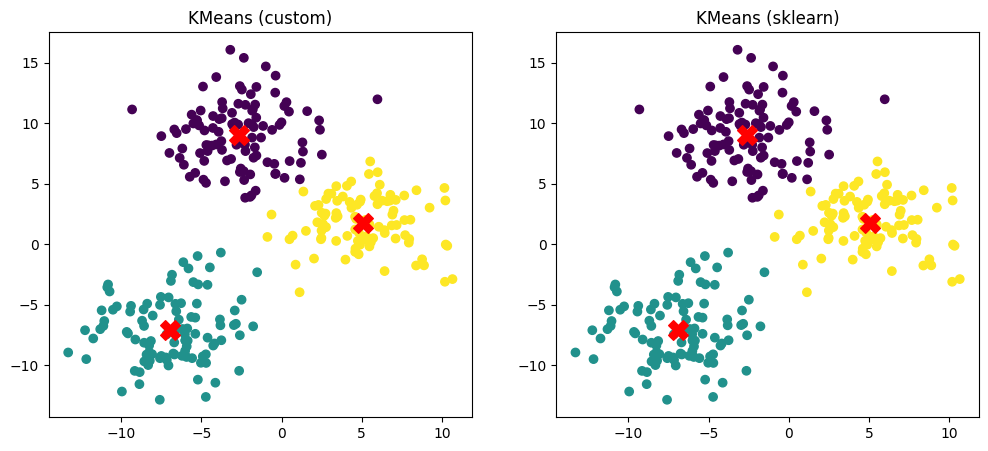

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(X[:, 0], X[:, 1], c=labels_scratch, cmap='viridis')
axes[0].scatter(kmeans_scratch.centroids[:, 0], kmeans_scratch.centroids[:, 1],
                s=200, c='red', marker='X')
axes[0].set_title("KMeans (custom)")

axes[1].scatter(X[:, 0], X[:, 1], c=labels_sklearn, cmap='viridis')
axes[1].scatter(kmeans_sklearn.cluster_centers_[:, 0], kmeans_sklearn.cluster_centers_[:, 1],
                s=200, c='red', marker='X')
axes[1].set_title("KMeans (sklearn)")

plt.show()